# ASSIGNMENT - 2

## Installing required packages

In [60]:
! pip install itables
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1. Load Dataset


In [61]:
# Importing Packages
import os

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

# Setting Directory
CURR_DIR = os.getcwd()
DATA_DIR = "./Churn_Modelling_Haripriya.csv"

# Opening Directory
data = pd.DataFrame(pd.read_csv(os.path.join(CURR_DIR,DATA_DIR)))

In [62]:
# To change display method
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

data.head(3)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1

In [63]:
data.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

## 2. Data Visualizations

### Univariate Analysis
Univariate analysis is the simplest form of analyzing data. Uni means one, so in other words the data has only one variable. Univariate data requires to analyze each variable separately.

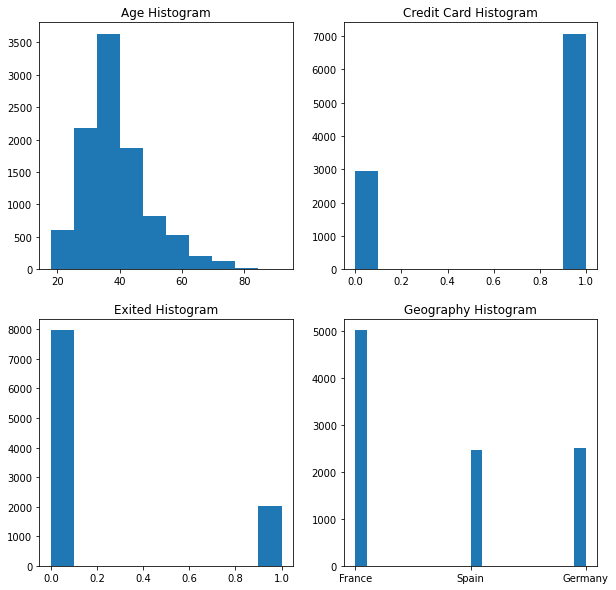

In [64]:
# Histograms
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(10, 10))

axes[0][0].hist(data['Age'],bins=10)
axes[0][0].set_title("Age Histogram")

axes[0][1].hist(data['HasCrCard'],bins=10)
axes[0][1].set_title("Credit Card Histogram")

axes[1][0].hist(data['Exited'],bins=10)
axes[1][0].set_title("Exited Histogram")

axes[1][1].hist(data['Geography'],bins=20)
axes[1][1].set_title("Geography Histogram")

plt.show()

In [65]:
cols = list(data.columns)
print(cols)
print(len(cols))

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
14


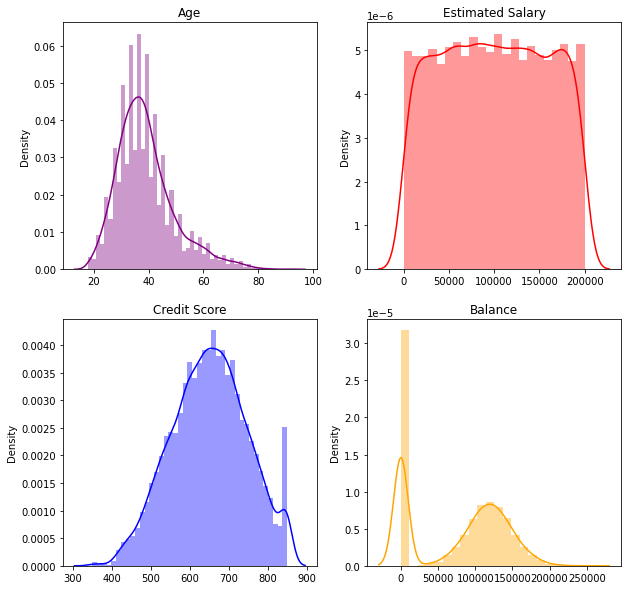

In [66]:
# Distribution Plots

fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(10, 10))

sns.distplot(ax=axes[0][0],x=data["Age"],color='purple')
axes[0][0].set_title("Age") 

sns.distplot(ax=axes[0][1],x=data["EstimatedSalary"],color='red') 
axes[0][1].set_title("Estimated Salary") 

sns.distplot(ax=axes[1][0],x=data["CreditScore"],color='blue') 
axes[1][0].set_title("Credit Score") 

sns.distplot(ax=axes[1][1],x=data["Balance"],color='orange') 
axes[1][1].set_title("Balance") 

plt.show()

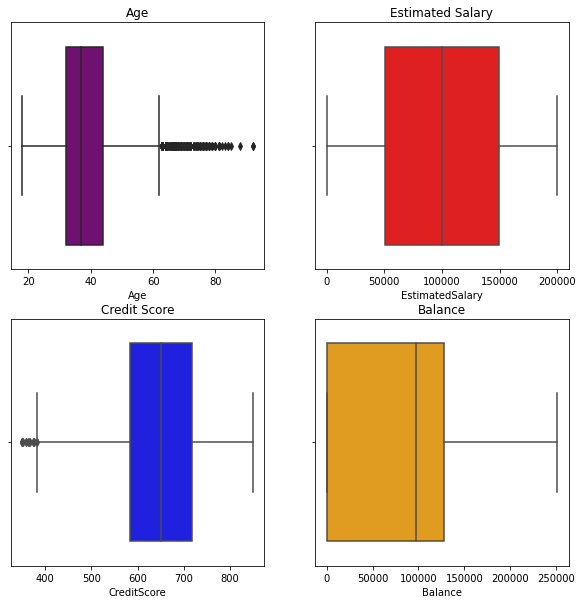

In [67]:
# Boxplots

fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(10, 10))

sns.boxplot(ax=axes[0][0],x=data["Age"],color='purple')
axes[0][0].set_title("Age") 

sns.boxplot(ax=axes[0][1],x=data["EstimatedSalary"],color='red') 
axes[0][1].set_title("Estimated Salary") 

sns.boxplot(ax=axes[1][0],x=data["CreditScore"],color='blue') 
axes[1][0].set_title("Credit Score") 

sns.boxplot(ax=axes[1][1],x=data["Balance"],color='orange') 
axes[1][1].set_title("Balance") 

plt.show()

### Bivariate Analysis

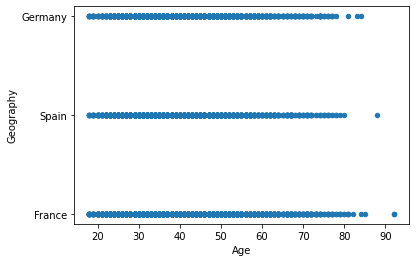

In [68]:
data.plot.scatter(x='Age', y='Geography')

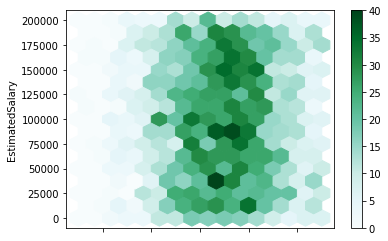

In [69]:
data[data['Balance'] < 10000].plot.hexbin(x='CreditScore', y='EstimatedSalary', gridsize=15)

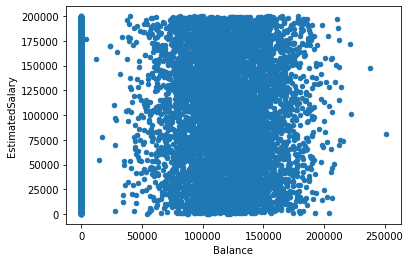

In [70]:
data.plot.scatter(x='Balance', y='EstimatedSalary')

### Multivariate Analysis
he statistical study of data where multiple measurements are made on each experimental unit and where the relationships among multivariate measurements and their structure are important

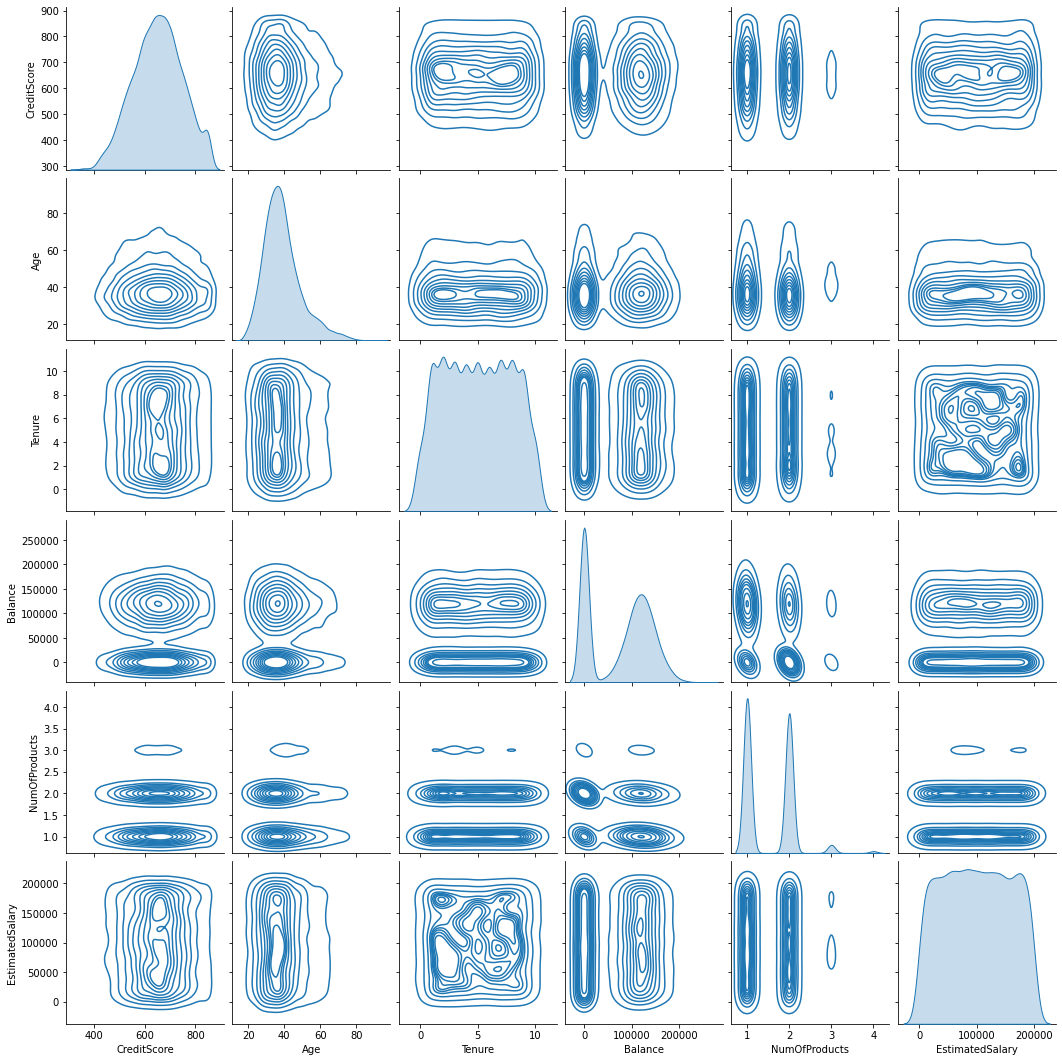

In [71]:
sns.pairplot(data=data[["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]],kind="kde")

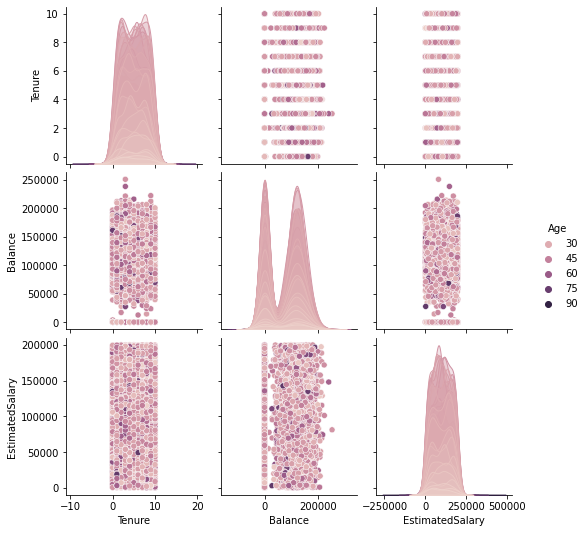

In [72]:
sns.pairplot(data=data[["Age","Tenure","Balance","EstimatedSalary"]], hue="Age")

## 3. Descriptive Statistics

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [74]:
data.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

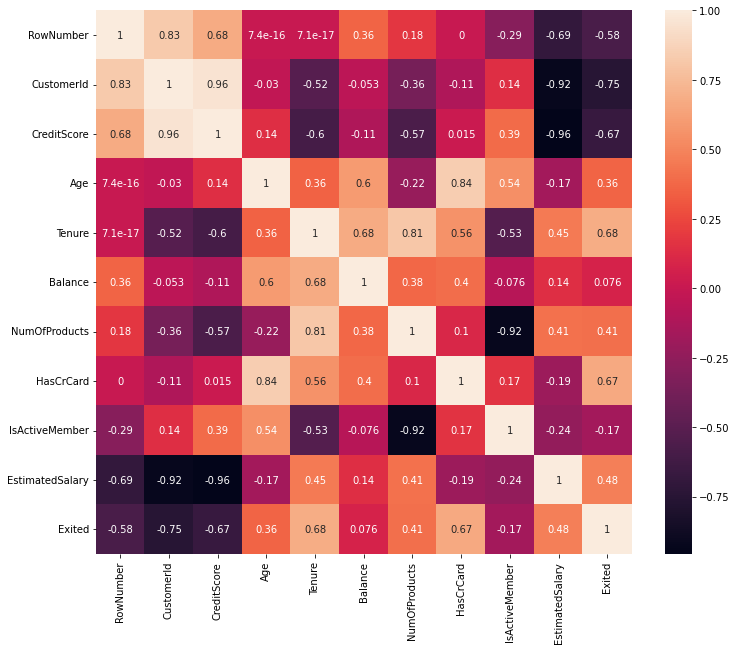

In [75]:
# Heatmap
fig= plt.figure(figsize  =(12,10))
sns.heatmap(data.head().corr(), annot = True)

## 4. Handle Missing Values

No missing values

In [76]:
data.isna().sum()
# No missing values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [77]:
# Removing Outliers based on Age since it correlated with majority of columns

def determine_outlier_thresholds_iqr(dataframe, col_name, th1=0.25, th3=0.75):
    quartile1 = dataframe[col_name].quantile(th1)
    quartile3 = dataframe[col_name].quantile(th3)
    iqr = quartile3 - quartile1
    upper_limit = quartile3 + 1.5 * iqr
    lower_limit = quartile1 - 1.5 * iqr
    return lower_limit, upper_limit

lower_limit,upper_limit = determine_outlier_thresholds_iqr(data,'Age')
data.loc[(data['Age'] < lower_limit), 'Age'] = lower_limit
data.loc[(data['Age'] > upper_limit), 'Age'] = upper_limit

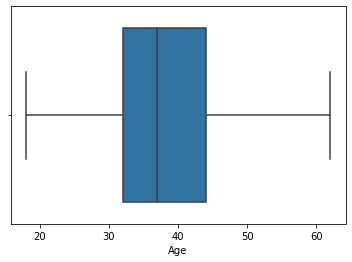

In [78]:
sns.boxplot(data['Age'])

## 5. Detecting Categorical Columns and Performing Encoding

In [79]:
data.head(5)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [80]:
categorical_columns = ['HasCrCard','IsActiveMember','Exited','Gender','Geography']
columns  = list(data.columns)
continuous_columns = list(set(columns).difference(set(categorical_columns)))
print(continuous_columns)

['Balance', 'RowNumber', 'Age', 'Surname', 'Tenure', 'NumOfProducts', 'CreditScore', 'EstimatedSalary', 'CustomerId']


In [81]:
# Dummy columns
# Removing dummy columns
dummy_columns = ['RowNumber','CustomerId','Surname']
data = data.drop(dummy_columns,axis=1)

In [82]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
text_columns =['Gender','Geography']

for column in text_columns:
  data[column] = label_encoder.fit_transform(data[column])

## 6. Seperating Dependent and Independent Variables


In [83]:
# Dependent Variable
label = 'EstimatedSalary'
# Independent Variables
columns = set(list(data.columns)).difference(label)

y = data[label]
X = data.drop([label],axis=1)

## 7. Scaling (Normalizing Values) of Independent Variables

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)

## 8. Train and Test Split

In [85]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=404)

In [87]:
print("X train shape : ",X_train.shape)
print("X test shape : ",X_test.shape)

X train shape :  (7500, 10)
X test shape :  (2500, 10)
